# Chart: Atmospheric $CO_2$ Levels Decomposed


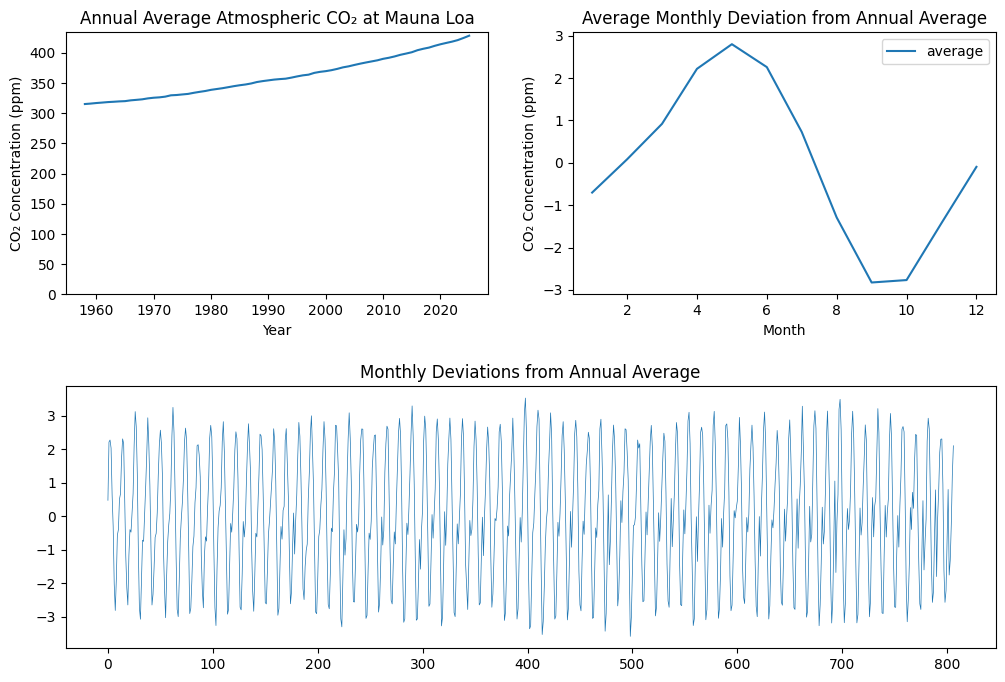

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the monthly CO₂ data from Mauna Loa (NOAA)
url = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv"

# Read the file while skipping metadata lines
mauna_loa_df = pd.read_csv(url, comment='#')

# Drop rows where 'average' is -99.99 (missing data)
mauna_loa_df = mauna_loa_df[mauna_loa_df["average"] != -99.99]
mauna_loa_df["date"] = pd.to_datetime(mauna_loa_df["year"].astype(int).astype(str) + "-" + mauna_loa_df["month"].astype(int).astype(str))

plt.figure(figsize=(12, 8))

mauna_loa_annual = mauna_loa_df.groupby("year")["average"].mean()
mauna_loa_annual.plot(ax=plt.subplot(2, 2, 1))
plt.title("Annual Average Atmospheric CO₂ at Mauna Loa")
plt.xlabel("Year")
plt.ylabel("CO₂ Concentration (ppm)")
plt.ylim(0)

mauna_loa_deviations = mauna_loa_df.join(mauna_loa_annual, on="year", rsuffix="_annual")
mauna_loa_deviations["difference"] = mauna_loa_deviations["average"] - mauna_loa_deviations["average_annual"]
mauna_loa_deviations["difference"].plot(ax=plt.subplot(2, 1, 2), linewidth=0.5)
plt.title("Monthly Deviations from Annual Average")

mauna_loa_monthly = mauna_loa_df.join(mauna_loa_annual, on="year", rsuffix="_annual")
mauna_loa_monthly = mauna_loa_monthly.groupby("month")[["average", "average_annual"]].mean()
mauna_loa_monthly["average"] = mauna_loa_monthly["average"] - mauna_loa_monthly["average_annual"]
mauna_loa_monthly.drop(columns=["average_annual"], inplace=True)
mauna_loa_monthly.plot(ax=plt.subplot(2, 2, 2))
plt.title("Average Monthly Deviation from Annual Average")
plt.xlabel("Month")
plt.ylabel("CO₂ Concentration (ppm)")

plt.subplots_adjust(hspace=0.35)

plt.show()